$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge N°5| Visualización, pre-procesamiento y procesamiento de datos}$$



### Grupo N°4:

- Alonso Santiago Morán Espinoza
- Sergio Enrique Moreno Elescano

## Carga de dataset y librerias

1) El primer paso para la resolución del ejercicio práctico es la carga de librerías y el dataset denominado "ADMISSIONS.csv" utilizando la libtería pandas

In [33]:
# Importación de librerías

import pandas as pd
import numpy
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn import preprocessing

# Visualizamos los encabezados junto a los valores de cada columna
# Hacemos uso de la variable df_cancer

df_admin = pd.read_csv("Challenge5.csv")
df_admin.head()


,cid,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,...,Number_of_OSO_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,1046,123.11,1.07,9,4,1,0,0,0,0,...,0,0,68.87,7.03,1.01,5.98,7.11,3.24,63,63
1,124704,165.16,1.52,13,6,2,0,0,0,2,...,0,0,107.25,9.17,1.00,8.13,10.08,4.89,85,84
2,171646,265.05,-1.77,11,3,1,0,1,0,0,...,0,0,59.86,7.03,0.16,42.54,11.00,4.79,84,81
3,171647,138.15,1.23,11,3,1,0,0,0,0,...,0,0,59.86,7.07,1.01,6.02,8.10,3.41,84,81
4,181450,157.56,1.60,8,4,1,0,0,0,0,...,0,0,68.87,7.65,1.01,6.59,8.10,3.41,64,66


## Análisis Exploratorio

2. Ahora se ingresará la información contenida en la variable df_cancer que corresponde a cada columna, se verifica la cantidad de valores que no son nulos.

In [34]:
# Se imprime la información de cada columna

print(df_admin.info())
df_admin.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cid                            300 non-null    int64  
 1   Molecular_weight               300 non-null    float64
 2   LogP                           300 non-null    float64
 3   Number_of_HBA_1                300 non-null    int64  
 4   Number_of_HBA_2                300 non-null    int64  
 5   Number_of_HBD_1                300 non-null    int64  
 6   Number_of_HBD_2                300 non-null    int64  
 7   Number_of_acidic_groups        300 non-null    int64  
 8   Number_of_aliphatic_OH_groups  300 non-null    int64  
 9   Number_of_basic_groups         300 non-null    int64  
 10  Fraction_of_rotatable_bonds    300 non-null    float64
 11  Number_of_heavy_bonds          300 non-null    int64  
 12  Number_of_heterocycles         300 non-null    int

,cid,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,...,Number_of_OSO_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
count,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.00,...,300.00,300.00,300.00,300.00,300.00,299.00,300.00,300.00,300.00,300.00
mean,36015275.95,334.81,7.93,30.13,4.46,1.43,1.49,0.32,0.55,0.04,...,0.00,0.01,75.36,11.47,0.95,12.22,19.53,8.19,268.38,291.97
std,40675212.18,142.95,6.13,18.27,1.22,0.86,1.17,0.52,0.93,0.29,...,0.00,0.16,22.64,3.64,0.17,8.28,8.10,3.57,176.79,207.52
min,1046.00,122.12,-1.77,7.00,2.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,26.30,6.79,0.00,5.67,7.11,3.16,59.00,62.00
25%,5281499.75,185.87,2.40,13.00,4.00,1.00,1.00,0.00,0.00,0.00,...,0.00,0.00,60.36,8.29,0.97,7.69,11.08,5.61,95.00,90.75
50%,13888710.50,352.39,6.63,27.00,4.00,1.00,1.00,0.00,0.00,0.00,...,0.00,0.00,69.50,11.22,0.97,10.95,22.17,7.53,230.00,233.00
75%,68806997.75,456.71,13.57,48.00,5.00,2.00,2.00,1.00,1.00,0.00,...,0.00,0.00,85.40,13.77,1.01,13.68,25.64,10.68,462.00,534.00
max,156025662.00,917.63,40.38,118.00,9.00,4.00,5.00,2.00,4.00,2.00,...,0.00,2.00,161.80,38.16,1.09,89.46,56.91,28.30,1008.00,1066.00


Se puede observar que no hay valores nulos en niguna de las 39 columnas, sin embargo hay un dato faltante en la columna 34 "Geometrical_shape_coefficient". Ademas, es adecuado mencionar que los datos del dataset con valores numéricos por lo que el trabajo será más fácil de realizar.

3) Evalua si la data esta balanceada para el target propuesto. Comenta tus resultados

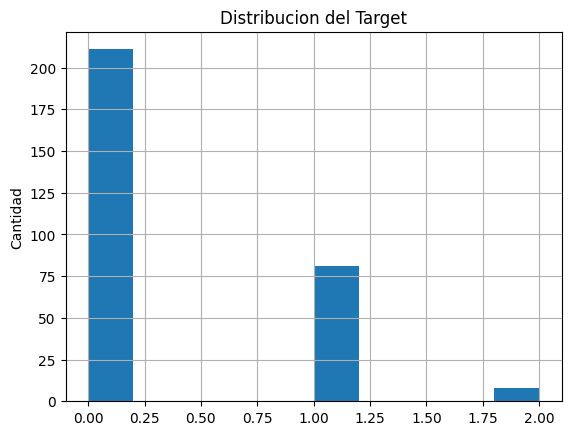

In [35]:
plt.hist(df_admin['Number_of_acidic_groups'])
plt.title('Distribucion del Target')
plt.grid()
plt.ylabel("Cantidad")
plt.show()

Analizando el Histograma podemos concluir que si se podrá trabjar con los datos. Hay una distribucion conveniente de las tres familias moleculares que se buscan clasificar

## Visualización de la data

A continuación, se propone un análasis visual más profundo de los datos propuestos. Para esto se observará lo siguiente:

- Distribución de cada variable
- Relación existente entre las variables
- Outlier en las variables

Este paso resulta fundamental para posteriormente procesar los datos según sea necesario.

### Distribucion de las variables

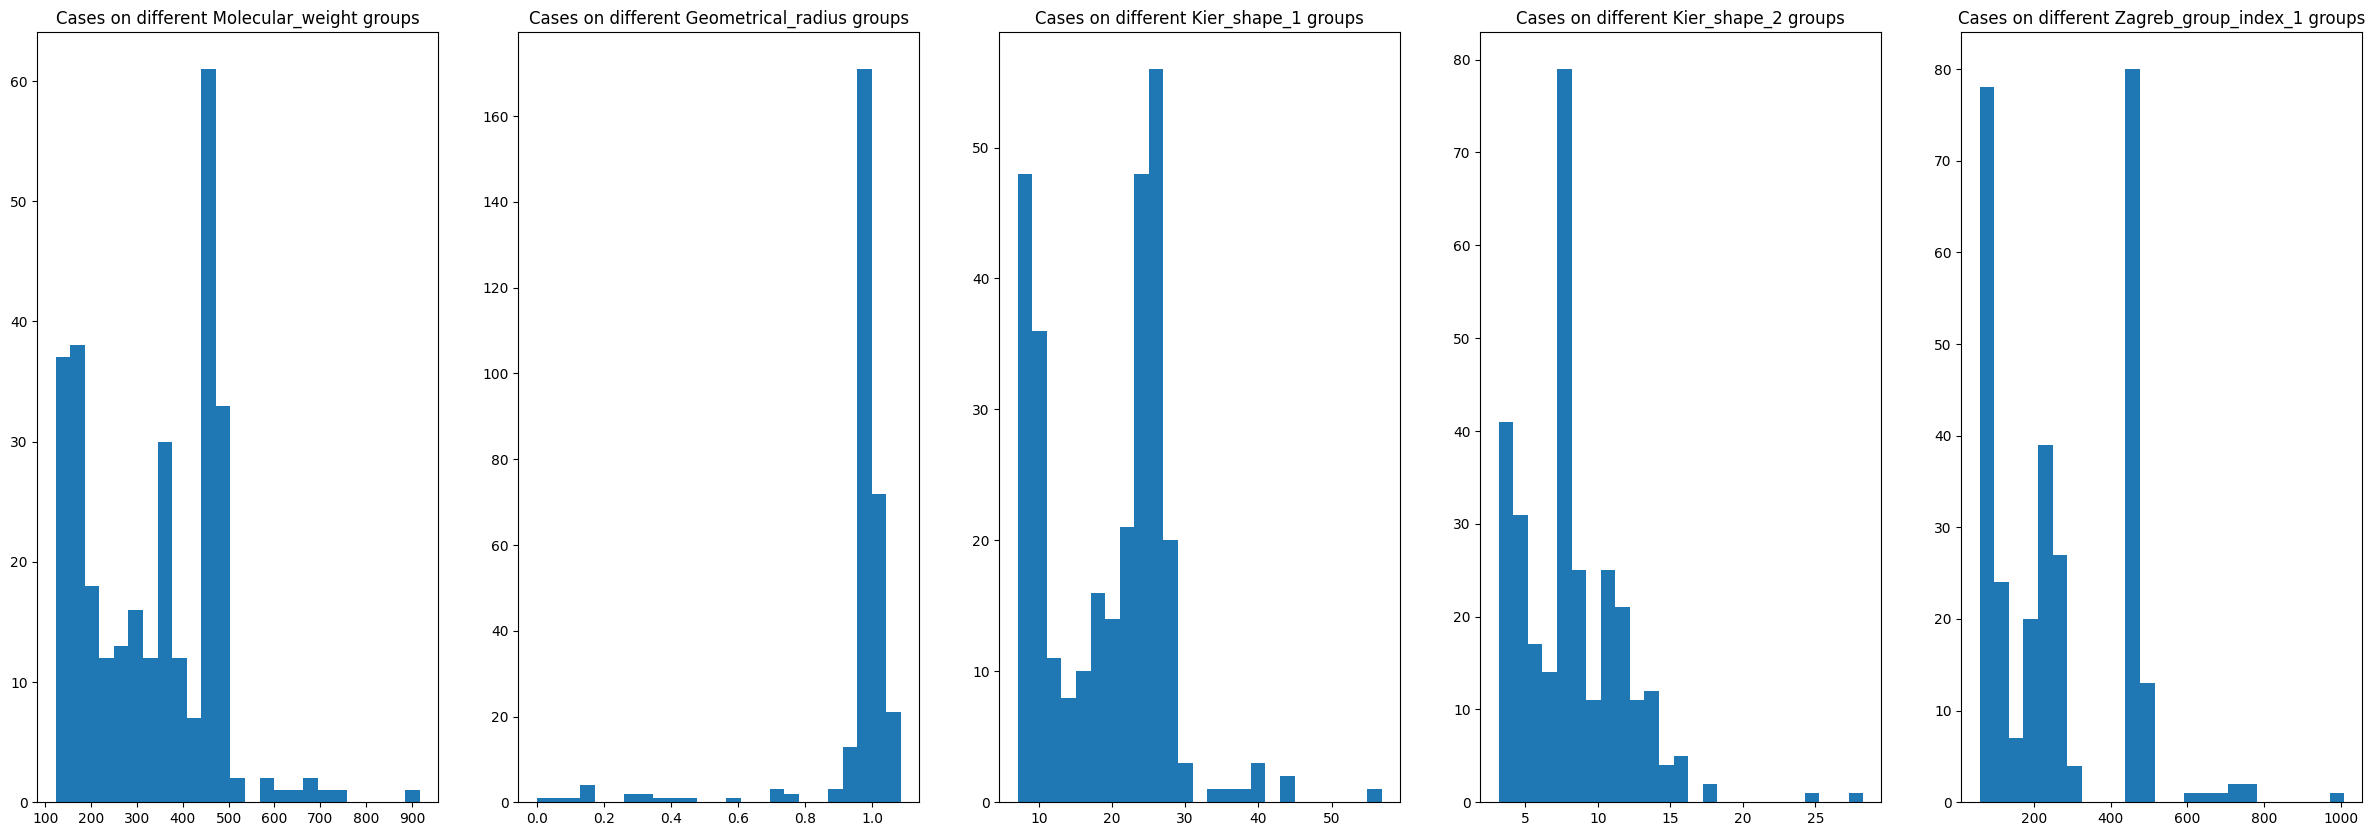

In [36]:
# Almacenamos en la variable 'grupo_molecular' la cantidad de grupos acidos de la molecula
#import label encoder
from sklearn import preprocessing
#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
df_admin['Number_of_acidic_groups'] = label_encoder.fit_transform(df_admin['Number_of_acidic_groups'])

grupo_molecular = df_admin


fig, axs = plt.subplots(1, 5, figsize=(30, 10))

count = 0
for feature in ['Molecular_weight', 'Geometrical_radius', 'Kier_shape_1', 'Kier_shape_2','Zagreb_group_index_1']:
    axs[count].hist(grupo_molecular[feature], bins=25)
    axs[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

#plt.show()



<Axes: >

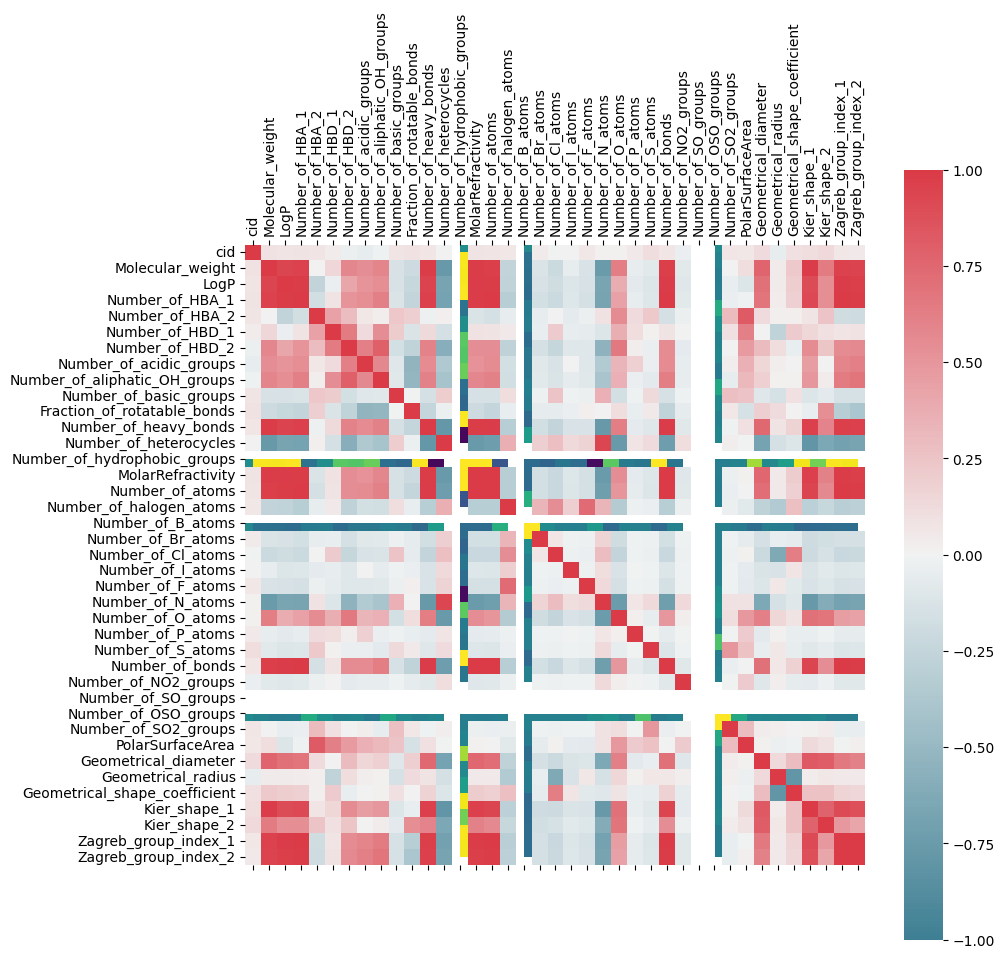

In [37]:
import seaborn as sns
#plt.matshow(df_heart.corr())
#plt.show()
#
corr = df_admin.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

## Procesamiento y Modelamiento

Para esta etapa del trabajo es necesario primero descargar e importar la librería lazypredict. A partir de esta se obtendrán modelos junto a sus valores más característicos para así escoger el más conveniente.

In [38]:
# Descarga e importanción de lazypredict

!gdown https://drive.google.com/uc?id=1KcIESuPAZilpnDAPKStt12g-KC3xpJcy
!pip -q install lazypredict

'gdown' is not recognized as an internal or external command,
operable program or batch file.


### Escalamiento de los datos

Se utilizará un scaler para procesar la información. Para esto se trabajará con el dataset procesado al que se le han aplicado labels, se utiliza la variable 'df_admin'

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Separamos del dataset el target para posteriormente entrenar la red neuronal

X = df_admin.drop(['Number_of_acidic_groups','Geometrical_shape_coefficient'], axis=1)
y = df_admin['Number_of_acidic_groups']

data_normalized = scaler.fit_transform(X)

# Convertir el resultado a un nuevo dataframe
X = pd.DataFrame(data_normalized, columns=X.columns)

### Entrenamiento del dataset

Para entrenar la red neuronal se tomará al 20% de los datos como herramientas para la prueba. Esto se configura directamente en la función train_test_split()

In [40]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =123, test_size=0.2)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models


100%|██████████| 29/29 [00:00<00:00, 39.46it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 24
[LightGBM] [Info] Start training from score -0.356675
[LightGBM] [Info] Start training from score -1.290984
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.95,0.96,None,0.95,0.02
LinearDiscriminantAnalysis,0.97,0.83,None,0.96,0.01
LGBMClassifier,0.97,0.81,None,0.96,0.10
DecisionTreeClassifier,0.97,0.81,None,0.96,0.01
ExtraTreesClassifier,0.97,0.81,None,0.96,0.07
LabelPropagation,0.95,0.80,None,0.95,0.01
LabelSpreading,0.95,0.80,None,0.95,0.01
SGDClassifier,0.93,0.80,None,0.93,0.01
XGBClassifier,0.95,0.79,None,0.95,0.07


Con el propósito del trabajo. Utilizaremos un modelo clásico de KNN (KNeighborsClassifier). También emplearemos un modelo Gaussiano (GaussianNB). Un modelo DecisionTreeClassifier. Un modelo Random Forest. Y finalmente, un modelo XGBoost.

### Modelo KNeigborsClassifier

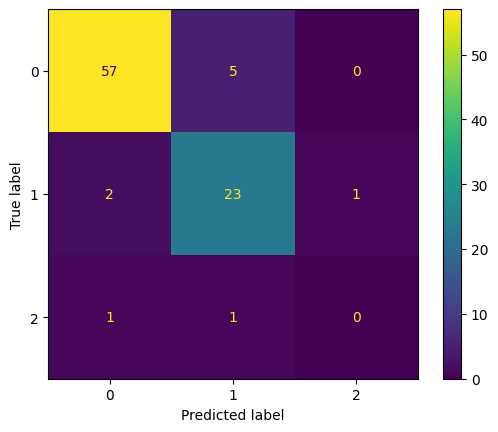

El valor de precision obtenido es de
Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        62
           1       0.79      0.88      0.84        26
           2       0.00      0.00      0.00         2

    accuracy                           0.89        90
   macro avg       0.58      0.60      0.59        90
weighted avg       0.88      0.89      0.89        90



In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

model=KNeighborsClassifier()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

confusion_matrix(y_test, y_pred, labels=[0,1])

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()
# Evaluate the model
rf_score = model.score(x_test, y_test)
print('El valor de precision obtenido es de')
print(f"Accuracy: {rf_score:.2f}")
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(x_test)))

### Modelo GaussianNB

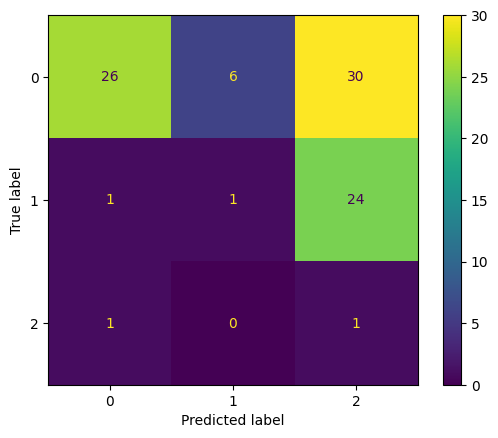

El valor de precision obtenido es de
Accuracy: 0.31
              precision    recall  f1-score   support

           0       0.93      0.42      0.58        62
           1       0.14      0.04      0.06        26
           2       0.02      0.50      0.04         2

    accuracy                           0.31        90
   macro avg       0.36      0.32      0.22        90
weighted avg       0.68      0.31      0.42        90



In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

model=GaussianNB()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

confusion_matrix(y_test, y_pred, labels=[0,1])

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()
# Evaluate the model
rf_score = model.score(x_test, y_test)
print('El valor de precision obtenido es de')
print(f"Accuracy: {rf_score:.2f}")
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(x_test)))

### Modelo DecisionTreeClassifier

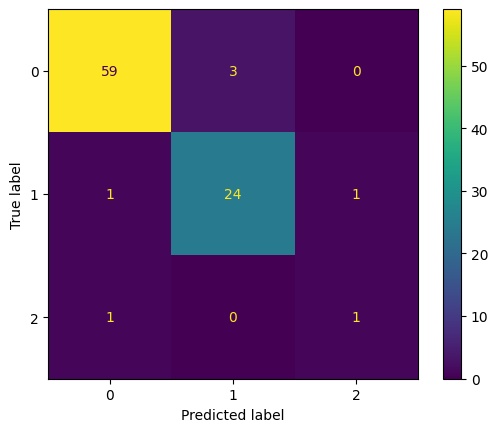

El valor de precision obtenido es de
Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        62
           1       0.89      0.92      0.91        26
           2       0.50      0.50      0.50         2

    accuracy                           0.93        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.93      0.93      0.93        90



In [43]:
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

model=DecisionTreeClassifier()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

confusion_matrix(y_test, y_pred, labels=[0,1])

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()
# Evaluate the model
rf_score = model.score(x_test, y_test)
print('El valor de precision obtenido es de')
print(f"Accuracy: {rf_score:.2f}")
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(x_test)))

### Modelo RandomForest

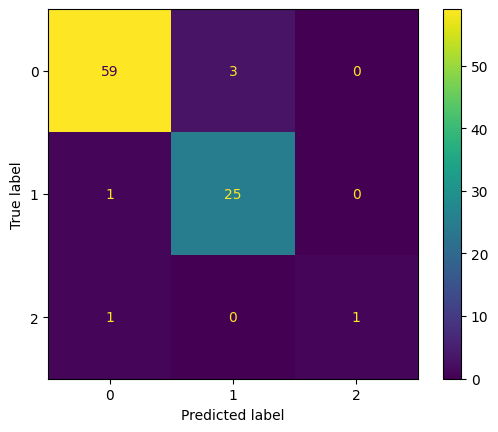

El valor de precision obtenido es de
Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        62
           1       0.89      0.96      0.93        26
           2       1.00      0.50      0.67         2

    accuracy                           0.94        90
   macro avg       0.95      0.80      0.85        90
weighted avg       0.95      0.94      0.94        90



In [44]:
from sklearn.ensemble import RandomForestClassifier

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

model=RandomForestClassifier()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

confusion_matrix(y_test, y_pred, labels=[0,1])

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()
# Evaluate the model
rf_score = model.score(x_test, y_test)
print('El valor de precision obtenido es de')
print(f"Accuracy: {rf_score:.2f}")
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(x_test)))

### Modelo XGBoost

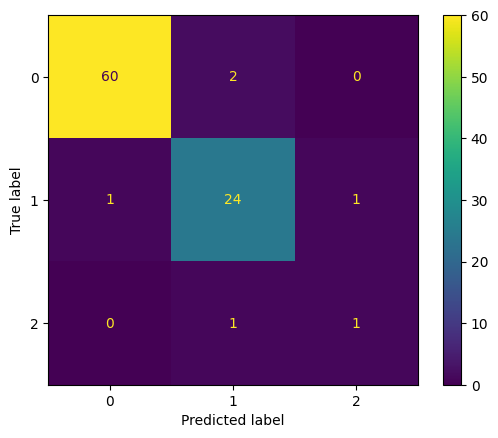

El valor de precision obtenido es de
Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        62
           1       0.89      0.92      0.91        26
           2       0.50      0.50      0.50         2

    accuracy                           0.94        90
   macro avg       0.79      0.80      0.79        90
weighted avg       0.95      0.94      0.94        90



In [45]:
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

model = xgb.XGBClassifier(n_estimators=10, max_depth=10, learning_rate=1, objective='binary:logistic')
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

confusion_matrix(y_test, y_pred, labels=[0,1])

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()
# Evaluate the model
rf_score = model.score(x_test, y_test)
print('El valor de precision obtenido es de')
print(f"Accuracy: {rf_score:.2f}")
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(x_test)))